In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

In [2]:
amzn = pd.read_csv('StockData/AMZN.csv', index_col = 'Date')
goog = pd.read_csv('StockData/GOOGL.csv', index_col = 'Date')

In [3]:
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,89.5625,79.046799,81.5000,89.3750,16117600,89.3750
2000-01-04,91.5000,81.750000,85.3750,81.9375,17487400,81.9375
2000-01-05,75.1250,68.000000,70.5000,69.7500,38457400,69.7500
2000-01-06,72.6875,64.000000,71.3125,65.5625,18752000,65.5625
2000-01-07,70.5000,66.187500,67.0000,69.5625,10505400,69.5625


In [4]:
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055


In [5]:
amzn.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,1815.670044,1798.729980,1800.109985,1814.189941,4238800,1814.189941
2019-04-02,1820.000000,1805.119995,1811.020020,1813.979980,3448100,1813.979980
2019-04-03,1830.000000,1809.619995,1826.719971,1820.699951,3980600,1820.699951
2019-04-04,1828.750000,1804.199951,1820.650024,1818.859985,3616700,1818.859985
2019-04-05,1838.579956,1825.189941,1829.000000,1837.280029,3633550,1837.280029


In [6]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,1200.199951,1186.359985,1187.540039,1198.979980,1385300.0,1198.979980
2019-04-02,1205.810059,1191.239990,1200.050049,1205.540039,914400.0,1205.540039
2019-04-03,1220.599976,1205.079956,1212.699951,1210.810059,1109600.0,1210.810059
2019-04-04,1220.550049,1209.040039,1211.290039,1219.449951,1049200.0,1219.449951
2019-04-05,1220.390015,1210.030029,1219.300049,1211.449951,1000676.0,1211.449951


We look at the big four stock as a preliminary analysis. In our study we choose to study the adjusted close value which is the closing value on any given day of trading that has been adjusted to include any distributions and corporate actions that occurred at any time before the next day's open. We start by concantenating all of the files together keeping only the Adjusted Close column.

In [7]:
#The following function concantenate the adjusted close column of all
def concData():
    with open("TSymbols.pickle", "rb") as g:
        tSymbols = pickle.load(g)
        
    adjCloseAll = pd.DataFrame()
    
    for count, ticker in enumerate(tSymbols):
        df = pd.read_csv('StockData/{}.csv'.format(ticker))
        df.set_index('Date', inplace = True)
        
        df.rename(columns = {'Adj Close': ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'], 1, inplace=True)
        
        if adjCloseAll.empty:
            adjCloseAll = df
        else:
            adjCloseAll = adjCloseAll.join(df, how='outer')

    adjCloseAll.to_csv('adjJoined.csv')

In [8]:
#concData()

In [9]:
adjJ = pd.read_csv('adjJoined.csv', index_col='Date')

In [10]:
plt.style.use('seaborn')

In [11]:
def visualize_data():
    adjJCorr = adjJ.corr()
    
    data = adjJCorr.values
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlBu)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = adjJCorr.columns
    row_labels = adjJCorr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


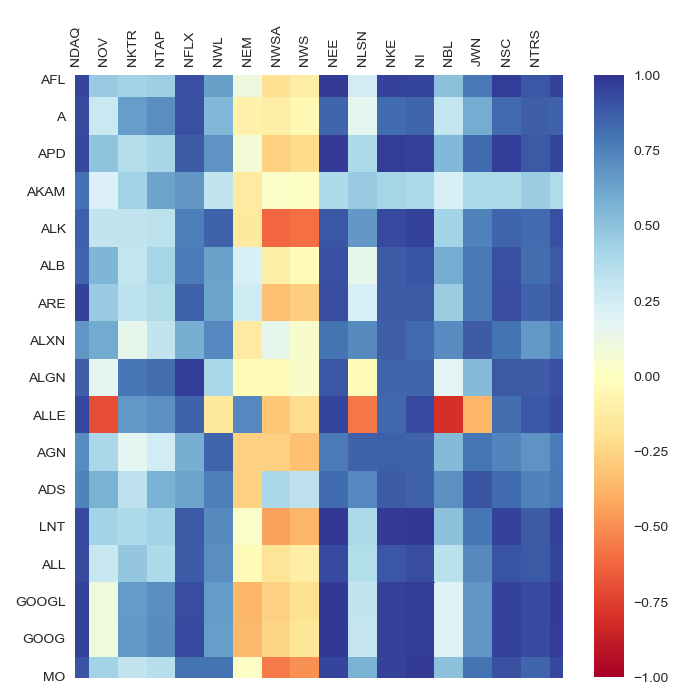

In [12]:
%matplotlib notebook
visualize_data()

In [13]:
big4Df = adjJ[['AMZN', 'AAPL', 'GOOGL', 'FB']]

In [14]:
big4Df = big4Df.dropna()
big4Df.index = pd.to_datetime(big4Df.index)

/Users/owenren/anaconda3/envs/FinancialAnalysis/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


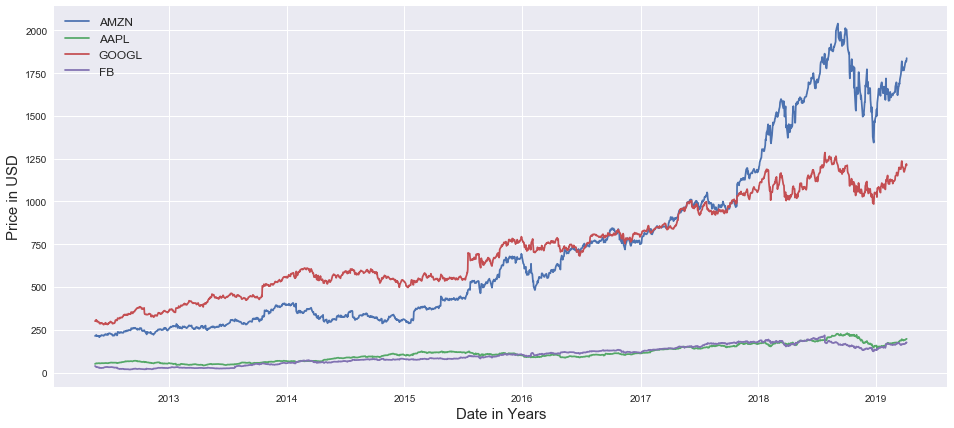

In [15]:
plt.figure(figsize=(16, 7))
for c in big4Df.columns.values:
    plt.plot(big4Df.index, big4Df[c], label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in USD', fontsize=15)
plt.xlabel('Date in Years', fontsize=15)
plt.show()

In [16]:
big4Df1 = big4Df.loc[(big4Df.index>='2018-01-01') & (big4Df.index<='2018-12-31')]

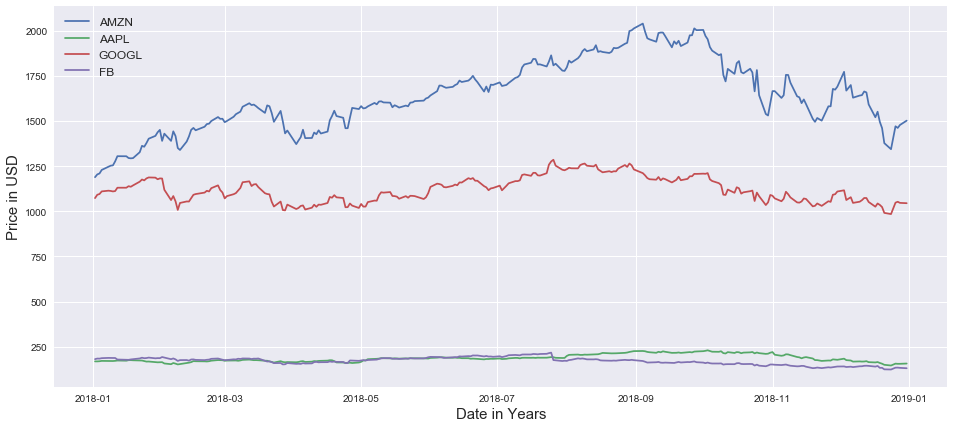

In [17]:
plt.figure(figsize=(16, 7))
for c in big4Df1.columns.values:
    plt.plot(big4Df1.index, big4Df1[c], label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in USD', fontsize=15)
plt.xlabel('Date in Years', fontsize=15)
plt.show()